# PROPENSITY MODELING (EDA)

## Importing Libraries

In [1]:
# Importing the necessary Libraries
import pandas as pd
import numpy as np
pd.set_option('display.max_rows',500)
pd.set_option('display.max_columns',500)

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import warnings 
warnings.filterwarnings('ignore')

## Loading Dataset

In [2]:
# Reading the data and changing the data type of the column "DateTime" from string to datetime format
data = pd.read_excel("final_customer_data.xlsx")
data['DateTime'] = pd.to_datetime(data['DateTime'])
print(data.shape)
data.head()

(2090, 9)


,User_id,Session_id,DateTime,Category,SubCategory,Action,Quantity,Rate,Total Price
0,52243841613,d76fde-8bb3-4e00-8c23,2019-01-10 10:20:00,Electronic Appliances,Speakers,first_app_open,NaN,NaN,NaN
1,52243841613,33dfbd-b87a-4708-9857,2019-01-10 10:22:00,Electronic Appliances,Speakers,search,NaN,NaN,NaN
2,57314161118,6511c2-e2e3-422b-b695,2019-01-10 14:00:00,Men's Fashion,Jeans,search,NaN,NaN,NaN
3,57314161118,90fc70-0e80-4590-96f3,2019-01-10 14:07:00,Men's Fashion,Jeans,product_view,NaN,NaN,NaN
4,57314161118,bd7419-2748-4c56-95b4,2019-01-10 14:12:00,Men's Fashion,Jeans,read_reviews,NaN,NaN,NaN


In [3]:
data.sample(10)

,User_id,Session_id,DateTime,Category,SubCategory,Action,Quantity,Rate,Total Price
615,52138390226,153b0a07-d89a-4ce2-b8c2,2019-10-26 14:03:00,Men's Fashion,Sunglasses,product_view,NaN,NaN,NaN
1611,58481913506,bcxvv9-f197-4bff-9efa,2019-04-21 15:14:01,Tablets,iPad,read_reviews,NaN,NaN,NaN
766,51520340170,437511f7-ecb4-4e0e-ba1f,2019-02-11 14:43:00,Baby Products,Baby Soap,read_reviews,NaN,NaN,NaN
1390,52942481269,84f02a8b-482c-4030-a246,2019-09-11 20:30:00,Toys,Puzzles,read_reviews,NaN,NaN,NaN
1962,59526755891,91d7edc5-090d-45d1-bde8,2019-12-11 13:40:00,Home furnishing,Bathroom Fitings,add_review,NaN,NaN,NaN
1490,60008348367,7cb4e28f-b56b-440c-ae79,2019-10-11 15:40:00,Electronic Appliances,Coffee makers,read_reviews,NaN,NaN,NaN
501,52055074267,b50d1ae8-1948-4517-8460,2019-10-21 23:27:00,Home Appliances,Lamp,add_to_cart,NaN,NaN,NaN
1141,59851958430,085aa864-10f4-43c4-90d6,2019-06-11 20:37:00,Tools and Utility,Hand tools,search,NaN,NaN,NaN
1495,57354053843,231ab4bd-2c99-4c19-9c8d,2019-10-11 16:04:00,Camera Accessories,Gimbles,search,NaN,NaN,NaN
1281,60282325526,c0565272-0858-4b5f-b173,2019-08-11 19:14:00,Essentials,Boxer's,search,NaN,NaN,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2090 entries, 0 to 2089
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   User_id      2090 non-null   int64         
 1   Session_id   2090 non-null   object        
 2   DateTime     2090 non-null   datetime64[ns]
 3   Category     2090 non-null   object        
 4   SubCategory  2090 non-null   object        
 5   Action       2090 non-null   object        
 6   Quantity     201 non-null    float64       
 7   Rate         201 non-null    float64       
 8   Total Price  201 non-null    float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 147.1+ KB


## Univariate Analysis:

#### Time range of Data:

In [5]:
# Timerange of data
print("Min Date: " +str(data.DateTime.min()))
print("Max Date: " +str(data.DateTime.max()))
print("Range: " +str(data.DateTime.max()-data.DateTime.min()))

Min Date: 2019-01-01 11:00:00
Max Date: 2019-12-22 17:52:00
Range: 355 days 06:52:00


#### Distribution of Category:

Total Unique Categories: 105


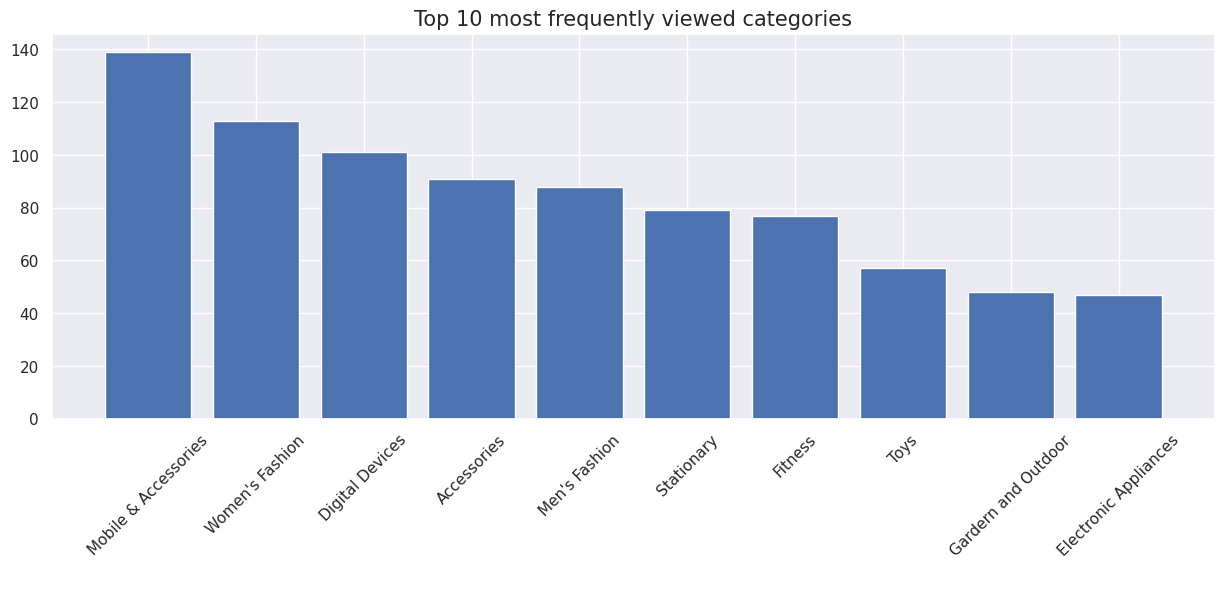

In [6]:
# Distribution of Category
print("Total Unique Categories: " + str(data.Category.nunique()))
temp_category = data.groupby('Category')['Session_id'].count().sort_values(ascending=False).reset_index()[:10]

plt.figure(figsize=(15,5))
plt.bar(temp_category.Category, temp_category.Session_id)
plt.title("Top 10 most frequently viewed categories", size=15)
plt.xticks(rotation=45)
plt.xlabel(" ")
plt.show()

#### Distribution of SubCategory:

Total Unique SubCategories: 364


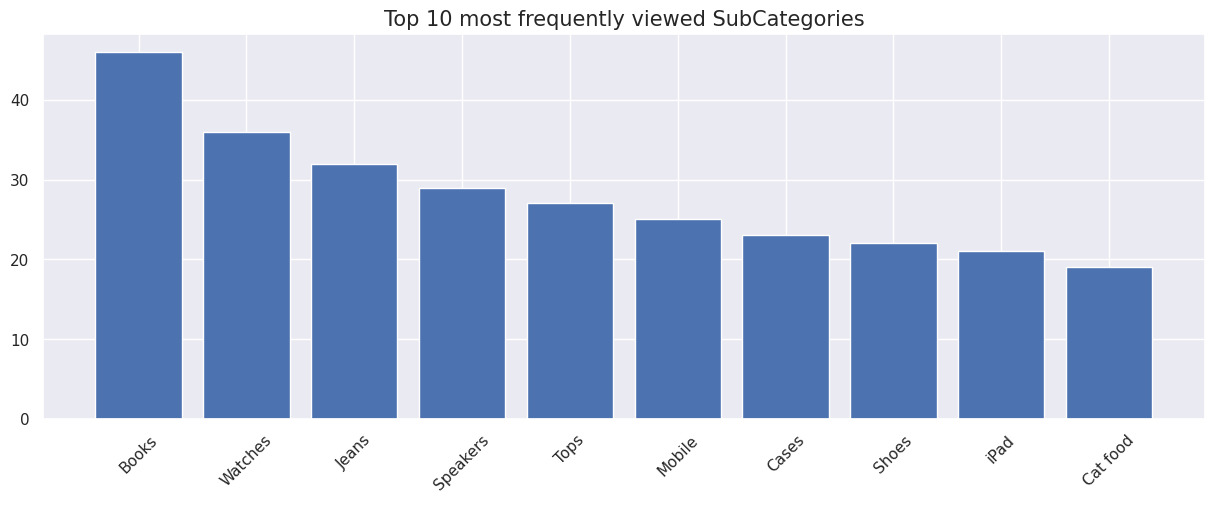

In [7]:
# Distribution of SubCategory
print("Total Unique SubCategories: " + str(data.SubCategory.nunique()))
temp_subcategory = data.groupby('SubCategory')['Session_id'].count().sort_values(ascending=False).reset_index()[:10]

plt.figure(figsize=(15,5))
plt.bar(temp_subcategory.SubCategory, temp_subcategory.Session_id)
plt.title("Top 10 most frequently viewed SubCategories", size=15)
plt.xticks(rotation=45)
plt.xlabel(" ")
plt.show()

#### Distribution of Action:

read_reviews           343
search                 320
product_view           292
add_to_cart            280
checkout               202
click_wishlist_page    202
purchase               201
first_app_open         121
add_review              69
add_to_wishlist         38
product_review          22
Name: Action, dtype: int64

Total Unique Actions: 11


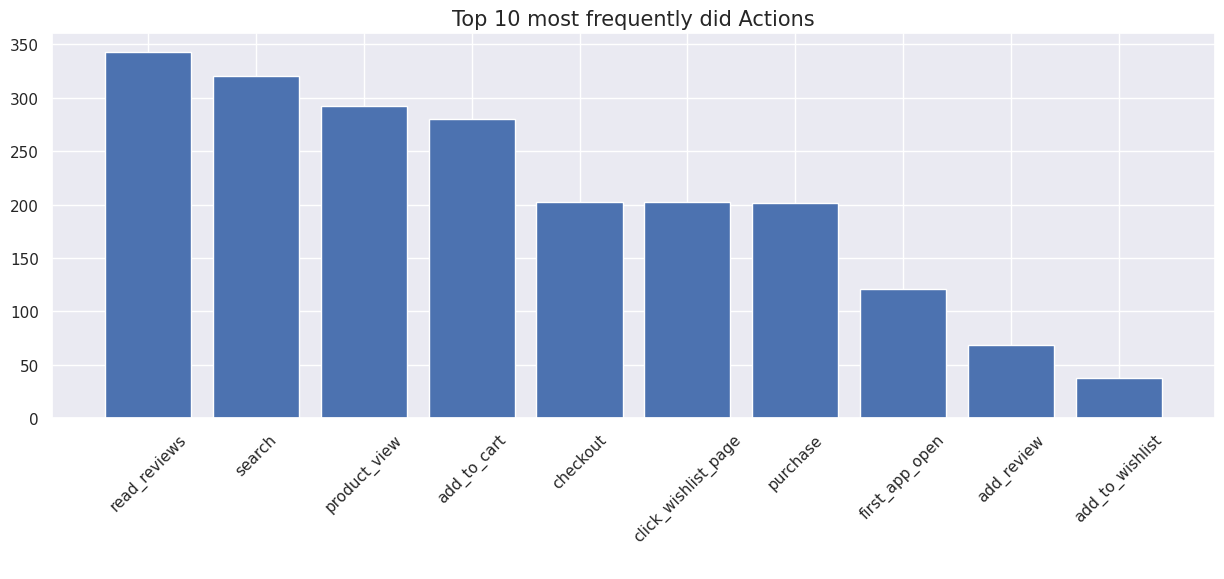

read_reviews           343
search                 320
product_view           292
add_to_cart            280
checkout               202
click_wishlist_page    202
purchase               201
first_app_open         121
add_review              69
add_to_wishlist         38
product_review          22
Name: Action, dtype: int64

In [9]:
# Distribution of Action
display(data.Action.value_counts())

data['Action'] = data['Action'].apply(lambda x: 'read_reviews' if x in ('read_review') else x)
data['Action'] = data['Action'].apply(lambda x: 'add_to_wishlist' if x in ('add_to_wishist') else x)

print("Total Unique Actions: " + str(data.Action.nunique()))
temp_actions = data.groupby('Action')['Session_id'].count().sort_values(ascending=False).reset_index()[:10]

plt.figure(figsize=(15,5))
plt.bar(temp_actions.Action, temp_actions.Session_id)
plt.title("Top 10 most frequently did Actions", size=15)
plt.xticks(rotation=45)
plt.xlabel(" ")
plt.show()

data.Action.value_counts()

In [10]:
data.head()

,User_id,Session_id,DateTime,Category,SubCategory,Action,Quantity,Rate,Total Price
0,52243841613,d76fde-8bb3-4e00-8c23,2019-01-10 10:20:00,Electronic Appliances,Speakers,first_app_open,NaN,NaN,NaN
1,52243841613,33dfbd-b87a-4708-9857,2019-01-10 10:22:00,Electronic Appliances,Speakers,search,NaN,NaN,NaN
2,57314161118,6511c2-e2e3-422b-b695,2019-01-10 14:00:00,Men's Fashion,Jeans,search,NaN,NaN,NaN
3,57314161118,90fc70-0e80-4590-96f3,2019-01-10 14:07:00,Men's Fashion,Jeans,product_view,NaN,NaN,NaN
4,57314161118,bd7419-2748-4c56-95b4,2019-01-10 14:12:00,Men's Fashion,Jeans,read_reviews,NaN,NaN,NaN


#### Distribution of Quantity:

Summary statistics for Quantity:


,Quantity
count,201.000000
mean,2.965174
std,7.161968
min,1.000000
25%,1.000000
50%,2.000000
75%,3.000000
max,100.000000


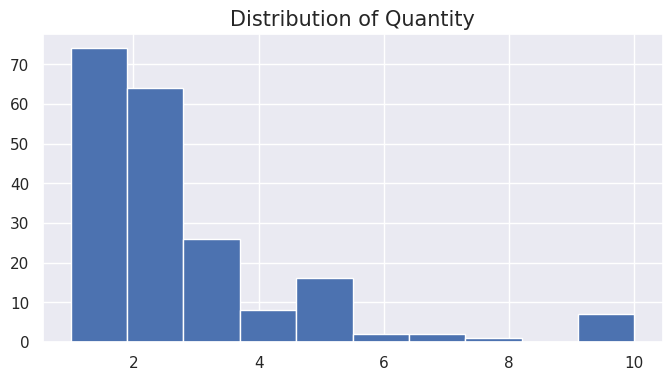

In [11]:
# Distribution of Quantity
print("Summary statistics for Quantity:")
display(data[['Quantity']].describe())

plt.figure(figsize=(8,4))
plt.hist(data[data['Quantity']<100]['Quantity'], density=False)
plt.title("Distribution of Quantity",size=15)
plt.show()

It is evident from the summary statistics that the "Quantity" column has an outlier (the value 100, occured only once in the dataset). 

#### Distribution of Rate:

Summary statistics for Rate:


,Rate
count,201.000000
mean,7133.283582
std,14778.150668
min,10.000000
25%,500.000000
50%,1200.000000
75%,6000.000000
max,90000.000000


Total records less than or equal to 75% cut: 154
Total records greater than 75% cut: 47


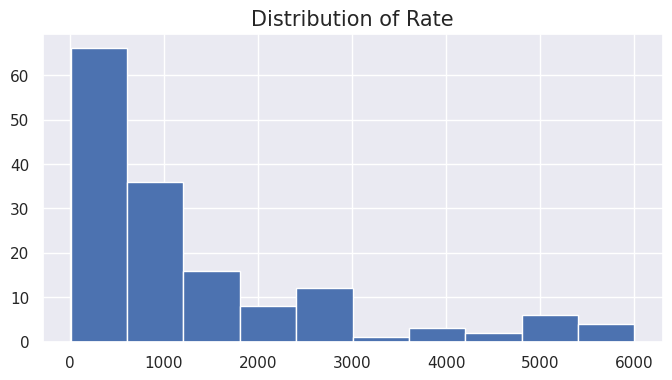

In [12]:
# Distribution of Rate
print("Summary statistics for Rate:")
display(data[['Rate']].describe())

print("Total records less than or equal to 75% cut: " + str(data[data['Rate']<=6000].shape[0]))
print("Total records greater than 75% cut: " + str(data[data['Rate']>6000].shape[0]))

plt.figure(figsize=(8,4))
plt.hist(data[data['Rate']<=6000]['Rate'], density=False, bins=10)
plt.title("Distribution of Rate",size=15)
plt.show()

#### Distribution of Total Price:

Summary statistics of Total Price:


,Total Price
count,201.000000
mean,9455.373134
std,18213.695424
min,150.000000
25%,1000.000000
50%,2500.000000
75%,8000.000000
max,160000.000000


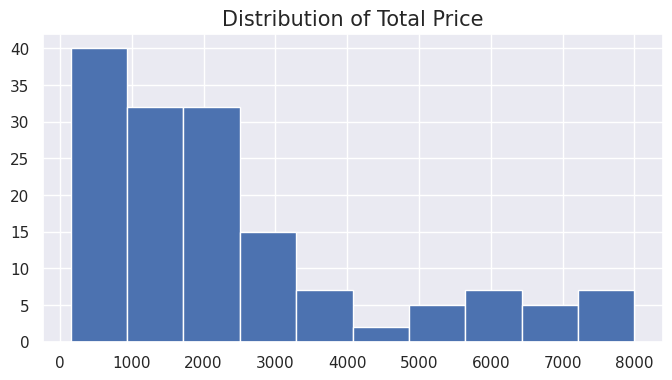

In [13]:
# Distribution of Total Price
print("Summary statistics of Total Price:")
display(data[['Total Price']].describe())

plt.figure(figsize=(8,4))
plt.hist(data[data['Total Price']<=8000]['Total Price'], density=False)
plt.title("Distribution of Total Price",size=15)
plt.show()

## Multivariate Analysis:

Multivariate analysis helps  to understand how two or more columns are related to each other and its relationship with the target variable.

Based on the initial understanding of the different columns in the data (univariate analysis), i'll create some hypothesis (if any) or try to ask more complex questions such as:
* total number unique users in the data and how many of them purchased atleast once? Also, what is the average number of purchase per customer?
* What is the most purchased Category/Sub-category?
* Do customers add the products to cart before they purchase or buy directly?
* What is the average time taken by a user to buy a product? 
* What is the average time between repeat purchase?
* What is the trend of unique users across the time period?
* What is the trend of purchase across the time period?



#### How many unique users in the data and how many of them purchased atleast once? Also, what is the average number of purchase per customer?

In [14]:
# unique customers 
total_users = data.User_id.nunique()
print(f"Total customers: {total_users}")

# atleast 1 purchase customer
atleast_one_purchase_cust = data[data['Action']=='purchase']['User_id'].nunique()
conversion = 100*round(atleast_one_purchase_cust/total_users,2)
print(f"Customers who made atleast 1 purchase: {atleast_one_purchase_cust} ({conversion}% conversion)")

# avg purchase per customer
purch_dist_by_cust = (data[data['Action']=='purchase'].groupby('User_id').agg({'SubCategory': 'count'})
                      .reset_index().sort_values(by='SubCategory',ascending=False)
                     )
purch_dist_by_cust.rename(columns={'SubCategory':'no_of_purchase'},inplace=True)

print(f"Average number of purchase per customer: {round(purch_dist_by_cust.no_of_purchase.mean(),2)}")
print("\nDistribution of Number of Purchases:")
display(purch_dist_by_cust[['no_of_purchase']].describe())


Total customers: 401
Customers who made atleast 1 purchase: 167 (42.0% conversion)
Average number of purchase per customer: 1.2

Distribution of Number of Purchases:


,no_of_purchase
count,167.000000
mean,1.203593
std,0.432685
min,1.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,3.000000


#### Which is the most purchased Category/Sub-category?

Total Unique Categories: 105


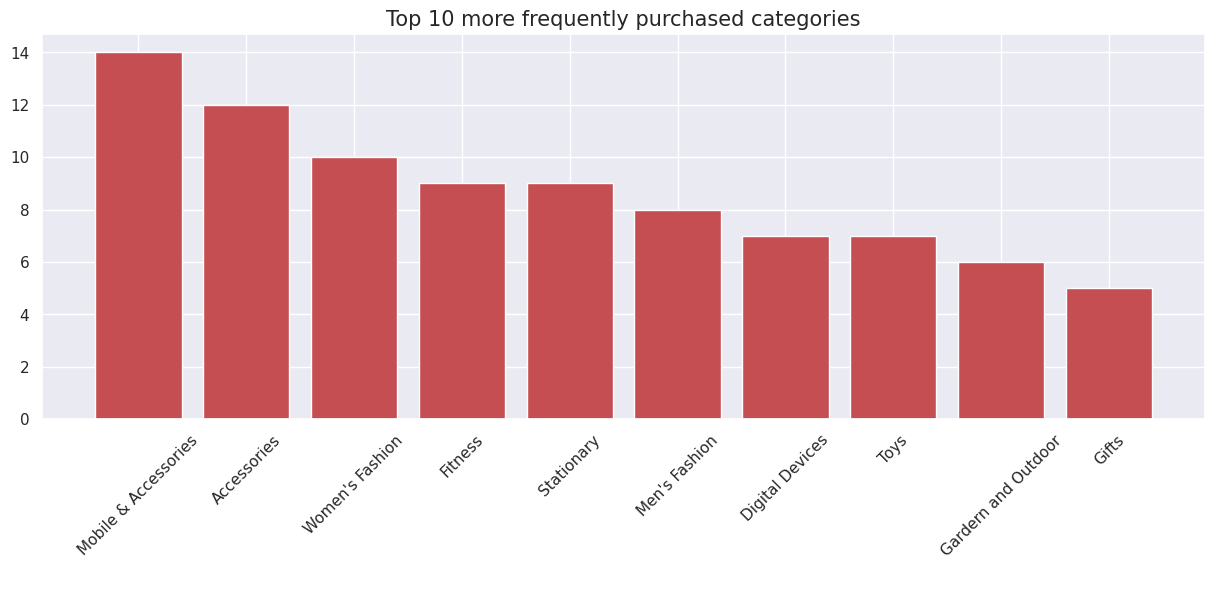

Total Unique SubCategory: 364


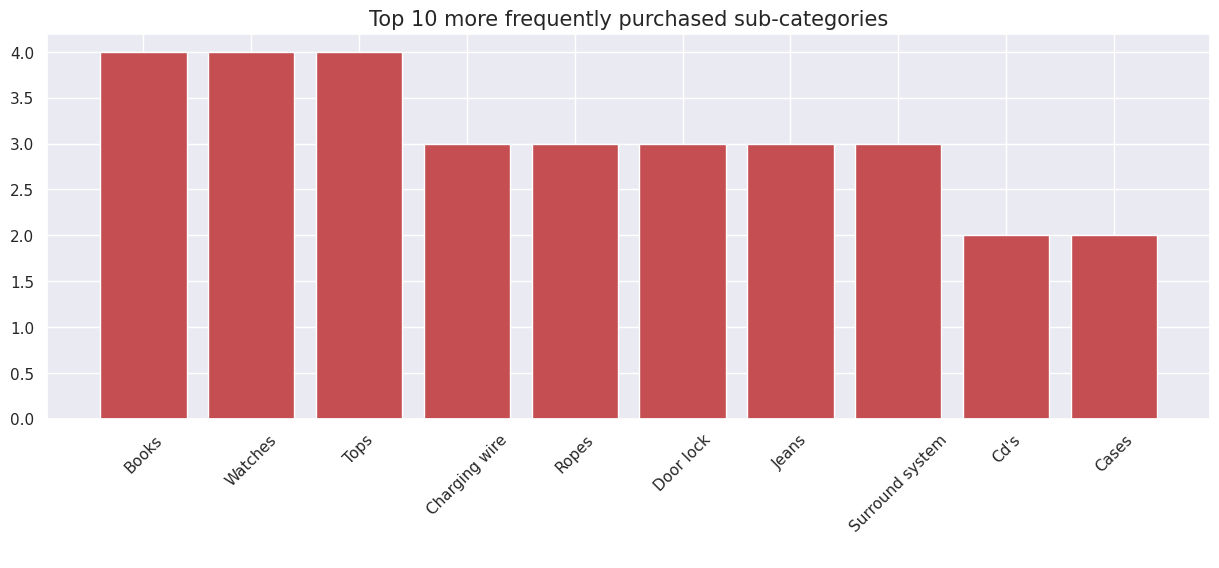

In [16]:
# Top 10 purchased Category
print("Total Unique Categories: " + str(data.Category.nunique()))
temp_category = data[data['Action']=='purchase'].groupby('Category')['User_id'].count().sort_values(ascending=False).reset_index()[:10]

plt.figure(figsize=(15,5))
plt.bar(temp_category.Category, temp_category.User_id, color='r')
plt.title("Top 10 more frequently purchased categories", size=15)
plt.xticks(rotation=45)
plt.xlabel(" ")
plt.show()

# Top 10 purchased SubCategory
print("Total Unique SubCategory: " + str(data.SubCategory.nunique()))
temp_subcategory = data[data['Action']=='purchase'].groupby('SubCategory')['User_id'].count().sort_values(ascending=False).reset_index()[:10]

plt.figure(figsize=(15,5))
plt.bar(temp_subcategory.SubCategory, temp_subcategory.User_id, color='r')
plt.title("Top 10 more frequently purchased sub-categories", size=15)
plt.xticks(rotation=45)
plt.xlabel(" ")
plt.show()

#### Do people add the products to cart before they purchase or buy directly?

In [17]:
# Distribution of users who purchased after adding to cart and direct purchase
purchase_users = data[data['Action']=='purchase'].groupby('User_id')['Action'].count().reset_index()

cart_users = data[data['Action']=='add_to_cart'].groupby('User_id')['Action'].count().reset_index()

temp = pd.merge(purchase_users,cart_users,on='User_id',how='left',indicator=True)
direct_buy = temp[temp['_merge']=='left_only'].shape[0]

temp = pd.merge(cart_users,purchase_users,on='User_id',how='left',indicator=True)
cart_only = temp[temp['_merge']=='left_only'].shape[0]

print("Total unique users who purchased: " + str(purchase_users.shape[0]))
print("Total direct buy (without adding to cart): " + str(direct_buy))
print("Total add_to_cart buy: " + str(cart_users.shape[0]-cart_only))

print("\nTotal unique users who added to cart: " + str(cart_users.shape[0]))
print("Total cart only users (no purchase): " + str(cart_only))

Total unique users who purchased: 167
Total direct buy (without adding to cart): 20
Total add_to_cart buy: 147

Total unique users who added to cart: 240
Total cart only users (no purchase): 93


#### What is the average time taken by a user to buy a product?

In [18]:
print(purch_dist_by_cust.shape)
purch_dist_by_cust.head()

(167, 2)


,User_id,no_of_purchase
165,60238282834,3
17,51565158157,3
0,51448162784,2
108,53966220604,2
34,51725305614,2



Summary statistics (Time diff in days):


,avg_time_diff_days
count,2090.000000
mean,58.562679
std,94.365687
min,0.000000
25%,0.000000
50%,0.000000
75%,105.000000
max,335.000000


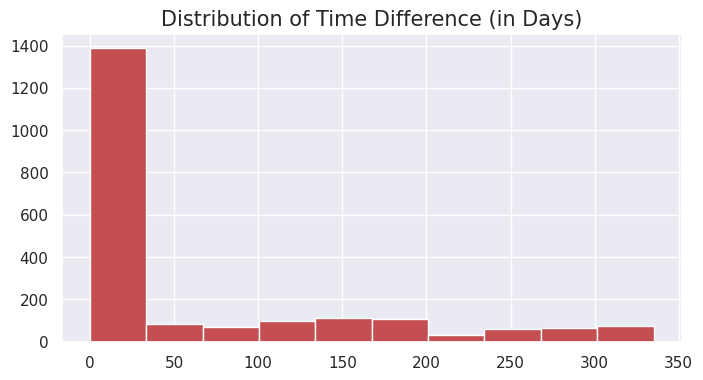


Summary statistics (Time diff in minutes):


,avg_time_diff_minutes
count,2090.000000
mean,231.705742
std,394.751734
min,0.000000
25%,14.000000
50%,30.000000
75%,242.000000
max,1404.000000


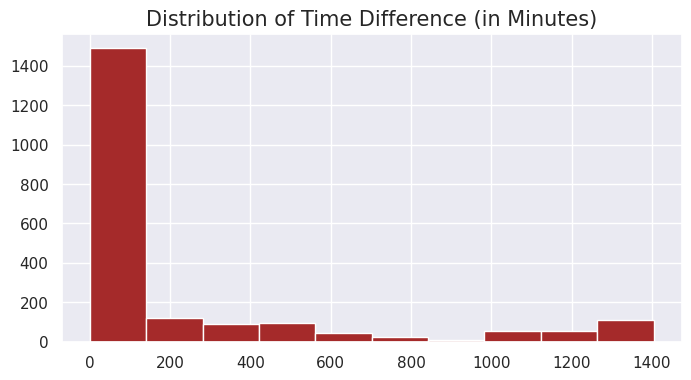

In [22]:
# Avg time difference between purchase
# Also after purchase users are either adding review or not. But since add_review event is low (69), ignoring it now
temp = data.copy()
temp = pd.merge(temp, purch_dist_by_cust, on='User_id', how='left')
temp['no_of_purchase'] = temp['no_of_purchase'].fillna(0)
# temp = temp[temp['no_of_purchase'] == 1].reset_index(drop=True)
# print("Total users who made exactly 1 purchase: " +str(temp.User_id.nunique()))

temp['min_time'] = temp.groupby('User_id')['DateTime'].transform(min)
temp['max_purchase_time'] = temp.groupby('User_id')['DateTime'].transform(max)
temp['avg_time_diff_days'] = (temp['max_purchase_time']-temp['min_time']).dt.days
temp['avg_time_diff_minutes'] = (temp['max_purchase_time']-temp['min_time']).dt.seconds/60

print("\nSummary statistics (Time diff in days):")
display(temp[['avg_time_diff_days']].describe())

plt.figure(figsize=(8,4))
plt.hist(temp['avg_time_diff_days'], density=False, color='r')
plt.title("Distribution of Time Difference (in Days)",size=15)
plt.show()

print("\nSummary statistics (Time diff in minutes):")
display(temp[['avg_time_diff_minutes']].describe())

plt.figure(figsize=(8,4))
plt.hist(temp['avg_time_diff_minutes'], density=False, color='brown')
plt.title("Distribution of Time Difference (in Minutes)",size=15)
plt.show()

#### What is the average time between repeat purchase?

Total users who made more than 1 purchase: 32

Summary statistics (Time diff in days):


,diff
count,32.00000
mean,101.03125
std,76.81628
min,0.00000
25%,35.25000
50%,90.50000
75%,177.25000
max,245.00000


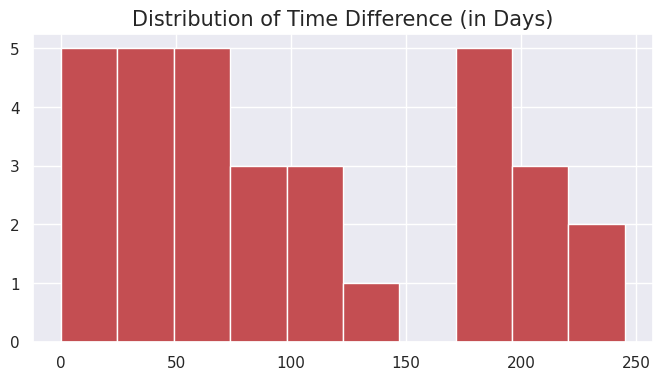

In [23]:
# Average time between repeat purchase
temp = data.copy()
temp = pd.merge(temp, purch_dist_by_cust, on='User_id', how='left')
temp['no_of_purchase'] = temp['no_of_purchase'].fillna(0)
temp = temp[temp['no_of_purchase'] > 1].reset_index(drop=True)
print("Total users who made more than 1 purchase: " +str(temp.User_id.nunique()))

def purch_time_diff(x):
    if len(x) == 2:
        return (x[1]-x[0]).days

    if len(x) == 3:
        diff_12 = (x[1]-x[0]).days
        diff_23 = (x[2]-x[1]).days
        return (diff_12+diff_23)/2

test = temp[temp['Action']=='purchase'].sort_values(by=['User_id','DateTime'])
test = test.groupby('User_id').agg({'DateTime': lambda x: list(x)})
test['diff'] = test['DateTime'].apply(purch_time_diff)
test = test.reset_index()

print("\nSummary statistics (Time diff in days):")
display(test[['diff']].describe())

plt.figure(figsize=(8,4))
plt.hist(test['diff'], density=False, color='r')
plt.title("Distribution of Time Difference (in Days)",size=15)
plt.show()

In [24]:
test.sample(7)

,User_id,DateTime,diff
17,51969791374,"[2019-08-19 18:36:00, 2019-10-26 14:40:00]",67.0
12,51629142904,"[2019-01-10 21:08:00, 2019-09-03 18:10:00]",235.0
5,51481443687,"[2019-05-11 13:23:00, 2019-08-16 11:27:00]",96.0
29,59533420690,"[2019-10-11 14:03:00, 2019-10-11 14:17:00]",0.0
9,51589427926,"[2019-04-03 11:17:00, 2019-10-23 20:23:00]",203.0
13,51676463689,"[2019-05-27 11:45:00, 2019-10-10 17:47:00]",136.0
21,53966220604,"[2019-08-16 19:23:00, 2019-11-10 19:33:00]",86.0


#### What is the trend of unique users across time period?

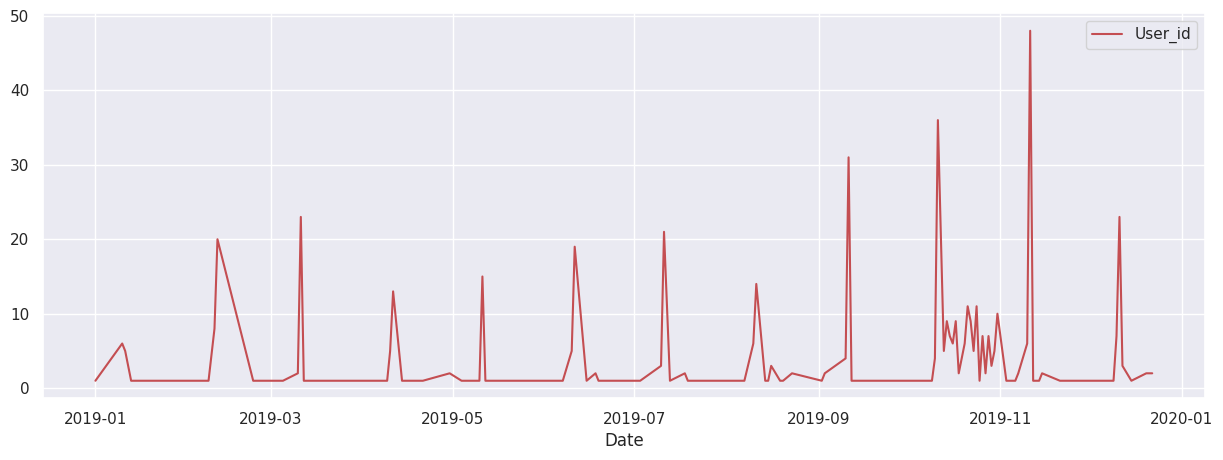

In [25]:
# Distribution of unique users across dates
temp = data.copy()
temp['Date'] = temp['DateTime'].dt.date
temp = temp.groupby('Date').agg({'User_id': 'nunique'}).reset_index().sort_values(by='Date')
# display(temp.head())

temp.set_index('Date').plot(figsize=(15,5), color='r')
plt.show()

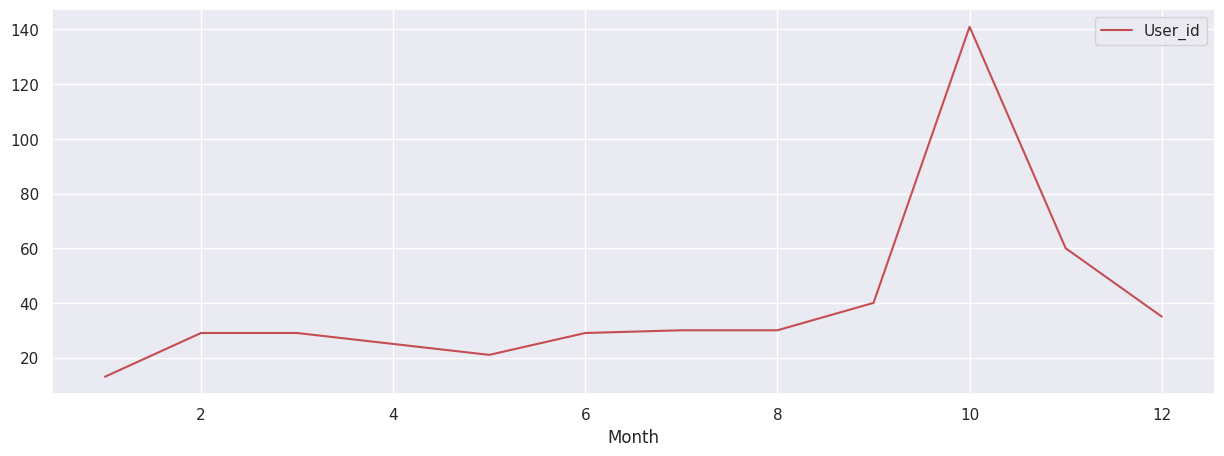

In [26]:
# Distribution of unique users across Month
temp = data.copy()
temp['Date'] = temp['DateTime'].dt.date
temp['Month'] = temp['DateTime'].dt.month
temp = temp.groupby('Month').agg({'User_id': 'nunique'}).reset_index().sort_values(by='Month')
# display(temp.head())

temp.set_index('Month').plot(figsize=(15,5),color='r')
plt.show()

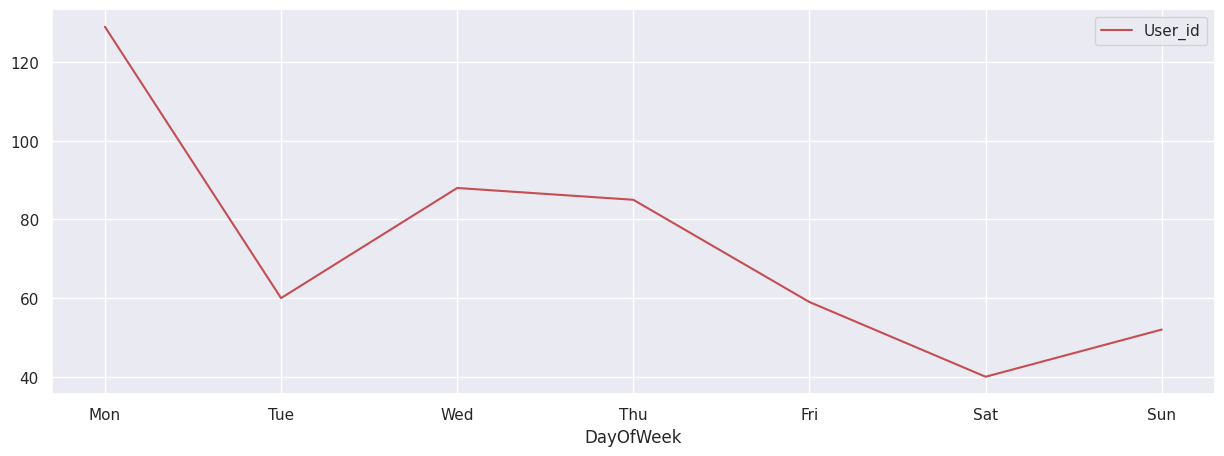

In [27]:
# Distribution of unique users across weekdays
temp = data.copy()
temp['Date'] = temp['DateTime'].dt.date
temp['Month'] = temp['DateTime'].dt.month
temp['DayOfWeek'] = temp['DateTime'].dt.dayofweek
temp = temp.groupby('DayOfWeek').agg({'User_id': 'nunique'}).reset_index().sort_values(by='DayOfWeek')
# display(temp.head())

temp.set_index('DayOfWeek').plot(figsize=(15,5),color='r')
plt.xticks([0,1,2,3,4,5,6],['Mon','Tue','Wed','Thu','Fri','Sat','Sun'])
plt.show()

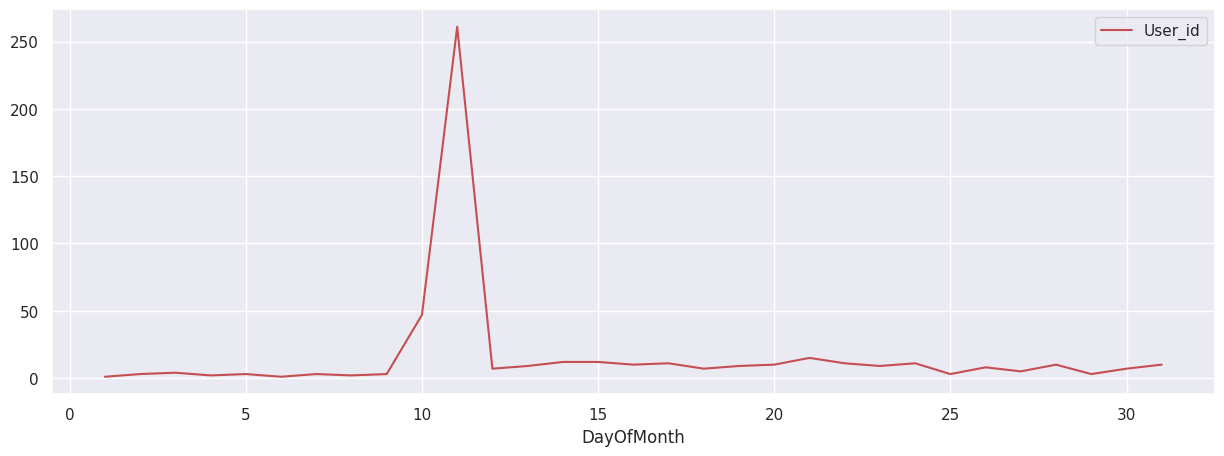

In [28]:
# Distribution of unique users across day of month
temp = data.copy()
temp['Date'] = temp['DateTime'].dt.date
temp['Month'] = temp['DateTime'].dt.month
temp['DayOfWeek'] = temp['DateTime'].dt.dayofweek
temp['DayOfMonth'] = temp['DateTime'].dt.day
temp = temp.groupby('DayOfMonth').agg({'User_id': 'nunique'}).reset_index().sort_values(by='DayOfMonth')
# display(temp.head())

temp.set_index('DayOfMonth').plot(figsize=(15,5),color='r')
plt.show()

#### What is the trend of purchase across the time period?

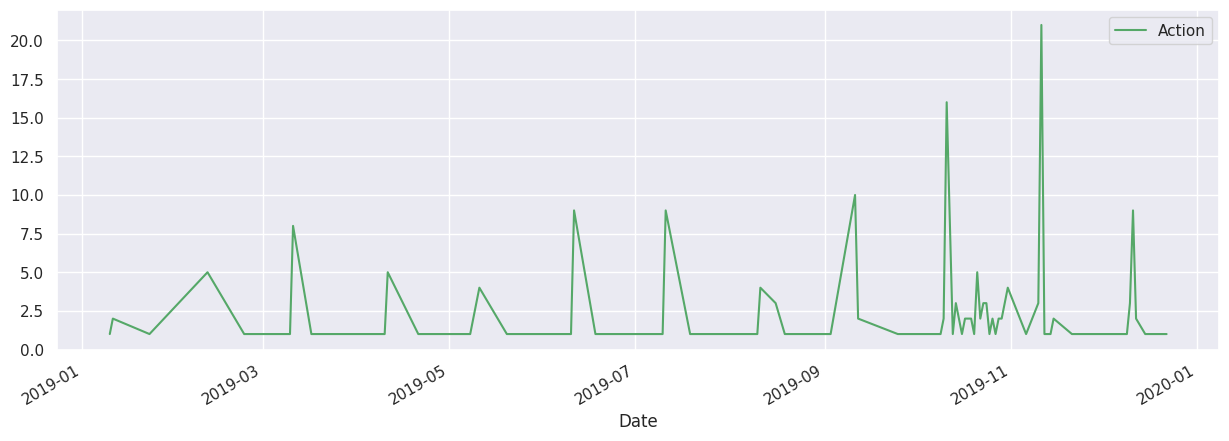

In [29]:
# Distribution of purchases across dates
temp = data.copy()
temp['Date'] = temp['DateTime'].dt.date
temp['Date'] = pd.to_datetime(temp['Date'])
temp['Month'] = temp['DateTime'].dt.month
temp['DayOfWeek'] = temp['DateTime'].dt.dayofweek
temp = temp[temp['Action']=='purchase'].groupby('Date').agg({'Action': 'count'}).reset_index().sort_values(by='Date')
# display(temp.head())
# print(temp.Action.sum())

temp.set_index('Date').plot(figsize=(15,5), color='g')
plt.show()